<a href="https://colab.research.google.com/github/anjuunni/Sample/blob/main/nba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Load Data

In [ ]:
with open("nba_2013.csv", 'r') as csvfile:
    nba_1 = pd.read_csv(csvfile)

In [ ]:
nba_1.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [ ]:
player=nba_1.player
player

0          Quincy Acy
1        Steven Adams
2         Jeff Adrien
3       Arron Afflalo
4       Alexis Ajinca
            ...      
476       Tony Wroten
477        Nick Young
478    Thaddeus Young
479       Cody Zeller
480      Tyler Zeller
Name: player, Length: 481, dtype: object

##Understanding Data

#####player:Name of the player
#####pos:Position of the player
#####age:Age of the player
#####bref_team_id:Team of the player
#####g:Games played
#####gs:Games Started
#####mp:Minutes played
#####fg:Field Goals
#####fga:Field Goal Attempts
#####fg.: Field Goal Percentage
#####x3p:3 point Field Goals
#####x3pa:3 point Field Goal Attempts
#####x3p.: 3 point Field Goals Percentage
#####x2p:2 point Field Goals
#####x2pa:2 point Field Goal Attempts
#####x2p.: 2 point Field Goals Percentage
#####efg.:Effective Field Goal Percentage
#####ft:Free Throws
#####fta:Free Throw Attempts
#####ft.: Free Throw Percentage
#####orb:Offensive Rebounds
#####drb:Defensive Rebounds
#####trb:Total Rebounds
#####ast:Assists
#####stl:Steals
#####blk:Blocks
#####tov:Turnovers
#####pf:Personal Fouls
#####pts:Points
#####season:Season
#####season_end:Season_end

##Preprocessing

####Position feature is categorical.We should change that into numerical through one hot encoding

In [ ]:
dummies=pd.get_dummies(nba_1.pos)

In [ ]:
dummies.head()

,C,F,G,PF,PG,SF,SG
0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0


In [ ]:
nba_2=pd.concat([nba_1,dummies],axis='columns')

In [ ]:
nba_2.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end,C,F,G,PF,PG,SF,SG
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013,0,0,0,0,0,1,0
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013,1,0,0,0,0,0,0
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013,0,0,0,1,0,0,0
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013,0,0,0,0,0,0,1
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013,1,0,0,0,0,0,0


In [ ]:
nba_3=nba_2.drop(['pos','SG'],axis='columns')

In [ ]:
nba_3.head(10)

,player,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end,C,F,G,PF,PG,SF
0,Quincy Acy,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013,0,0,0,0,0,1
1,Steven Adams,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013,1,0,0,0,0,0
2,Jeff Adrien,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013,0,0,0,1,0,0
3,Arron Afflalo,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013,0,0,0,0,0,0
4,Alexis Ajinca,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013,1,0,0,0,0,0
5,Cole Aldrich,25,NYK,46,2,330,33,61,0.541,0,0,NaN,33,61,0.540984,0.541,26,30,0.867,37,92,129,14,8,30,18,40,92,2013-2014,2013,1,0,0,0,0,0
6,LaMarcus Aldridge,28,POR,69,69,2498,652,1423,0.458,3,15,0.200000,649,1408,0.460938,0.459,296,360,0.822,166,599,765,178,63,68,123,147,1603,2013-2014,2013,0,0,0,1,0,0
7,Lavoy Allen,24,TOT,65,2,1072,134,300,0.447,2,13,0.153846,132,287,0.459930,0.450,33,50,0.660,119,192,311,71,24,33,44,126,303,2013-2014,2013,0,0,0,1,0,0
8,Ray Allen,38,MIA,73,9,1936,240,543,0.442,116,309,0.375405,124,234,0.529915,0.549,105,116,0.905,23,182,205,143,54,8,84,115,701,2013-2014,2013,0,0,0,0,0,0
9,Tony Allen,32,MEM,55,28,1278,204,413,0.494,11,47,0.234043,193,366,0.527322,0.507,76,121,0.628,79,129,208,94,90,19,90,121,495,2013-2014,2013,0,0,0,0,0,0


In [ ]:
nba_3.isnull().sum()

player           0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
C                0
F                0
G                0
PF               0
PG               0
SF               0
dtype: int64

In [ ]:
nba_3[nba_3['fg.'].isnull()]

,player,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end,C,F,G,PF,PG,SF
90,Josh Childress,30,NOP,4,0,24,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN,0,3,3,2,1,0,1,1,0,2013-2014,2013,0,0,0,0,0,1
397,Chris Smith,26,NYK,2,0,2,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,2013-2014,2013,0,0,0,0,1,0


In [ ]:
nba_4=nba_3.fillna(0)

In [ ]:
nba_4.isnull().sum()

player          0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
C               0
F               0
G               0
PF              0
PG              0
SF              0
dtype: int64

##Finding Best Features

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression

from sklearn.ensemble import RandomForestRegressor

####For prediction model we are not using columns like player,team,season,season_end as they are just player information



In [ ]:
orig_features=['age','g','gs','mp','fg','fga','fg.','x3p','x3pa','x3p.','x2p','x2pa','x2p.','efg.','ft','fta','ft.','orb','drb','trb','ast','stl','blk','tov','pf','C','F','G','PF','PG','SF']

In [ ]:
x_data = nba_4[orig_features].to_numpy()
y_data = nba_4[['pts']].to_numpy()
y_data = y_data.reshape(y_data.shape[0], )

In [ ]:
x_data

array([[23., 63.,  0., ...,  0.,  0.,  1.],
       [20., 81., 20., ...,  0.,  0.,  0.],
       [27., 53., 12., ...,  1.,  0.,  0.],
       ...,
       [25., 79., 78., ...,  1.,  0.,  0.],
       [21., 82.,  3., ...,  0.,  0.,  0.],
       [24., 70.,  9., ...,  0.,  0.,  0.]])

In [ ]:
y_data

array([ 171,  265,  362, 1330,  328,   92, 1603,  303,  701,  495,  572,
         38,  477,  564,  810,  436,  525, 2112,   28,  352, 1107,   25,
        401,  280,  930,  112,  240,   22,  170,  150,  660,  558,  738,
        625,  166,  911,  298, 1070,  666,  161,  403, 1249,  436,  911,
        217,  573,    3,   72,  222,  497,  378,  821,  763,    5,   12,
        492,  197,  491, 1042, 1281,  891,  419,  998,    7,  645,  159,
         64,   63,   83,  274,  115,  895, 1089,  587,  878,  136,   43,
        225,  485,  347,  925,  470,  101,  810,  967, 1167,  490,  716,
        480,  846,    0,   71,  257,   68,   47,  527,   25,  911,  338,
       1256,  153, 1614,   16,   33, 1282,  890,  356,  510,   26,    3,
       1873,  529,   42,   83,  144, 1394,  357,  641,   66,  177,   97,
        339, 1011, 1791,  717,  286,  202,  339, 1542, 1095,  511, 1119,
        929, 2593,    2,  145, 1560,    6,  401,  214, 1042, 1096,  416,
        164,  970,   19,  630,   68,  425,  638, 10

### Using Random Features

In [ ]:
regressor = RandomForestRegressor(n_estimators=200)

In [ ]:
regressor.fit(x_data, y_data)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
sorted_indices = np.argsort(regressor.feature_importances_)[::-1]

In [ ]:
for index in sorted_indices:
    print(f"{orig_features[index]}: {regressor.feature_importances_[index]}")

fg: 0.7592554613796806
fga: 0.21844529910652577
ft: 0.010086366445757123
fta: 0.003586179017147426
mp: 0.0009569512112065971
ft.: 0.0008391329803278928
x2p.: 0.0007562355380207449
tov: 0.0006474621760510055
efg.: 0.0005226793817430432
blk: 0.00045369895241416163
ast: 0.00040614900106211976
x3p: 0.00037469192043894107
x3pa: 0.0003639433923775306
g: 0.0003467640890403687
age: 0.00032941112370063366
x3p.: 0.00031901326164872313
gs: 0.0002918304593522093
stl: 0.000258602731598269
orb: 0.0002482025764524774
pf: 0.0002451414103640204
fg.: 0.00024139461939057653
drb: 0.00021889908144663366
x2p: 0.00021002130383356973
x2pa: 0.00017770793126927958
trb: 0.00017184800412640129
PF: 0.0001292331589117182
SF: 9.40603251869052e-05
C: 1.277765575291702e-05
PG: 1.0837485344957163e-05
F: 4.174757601878483e-09
G: 1.0506965860817219e-10


###Using Feature Selection

In [ ]:
selector = SelectKBest(mutual_info_regression, k=5)

In [ ]:
best_feat = selector.fit_transform(x_data, y_data)

In [ ]:
sorted_indices = np.argsort(selector.scores_)[::-1]

In [ ]:
for index in sorted_indices:
    print(f"{orig_features[index]}: {selector.scores_[index]:.4f}")

fg: 2.5684
fga: 2.2472
mp: 1.4661
x2p: 1.4542
x2pa: 1.4516
ft: 1.2501
fta: 1.1712
tov: 1.0829
drb: 0.9335
pf: 0.8903
stl: 0.8876
trb: 0.7790
ast: 0.7718
g: 0.7274
gs: 0.6330
x3pa: 0.5472
orb: 0.4837
x3p: 0.4716
blk: 0.3612
fg.: 0.3193
x2p.: 0.2970
ft.: 0.2692
efg.: 0.2505
x3p.: 0.1364
age: 0.0254
C: 0.0203
SF: 0.0043
PG: 0.0000
F: 0.0000
G: 0.0000
PF: 0.0000


## Correlation Matrix

In [ ]:
import seaborn as sns

In [ ]:
nba_5= nba_4[orig_features + ['pts']]

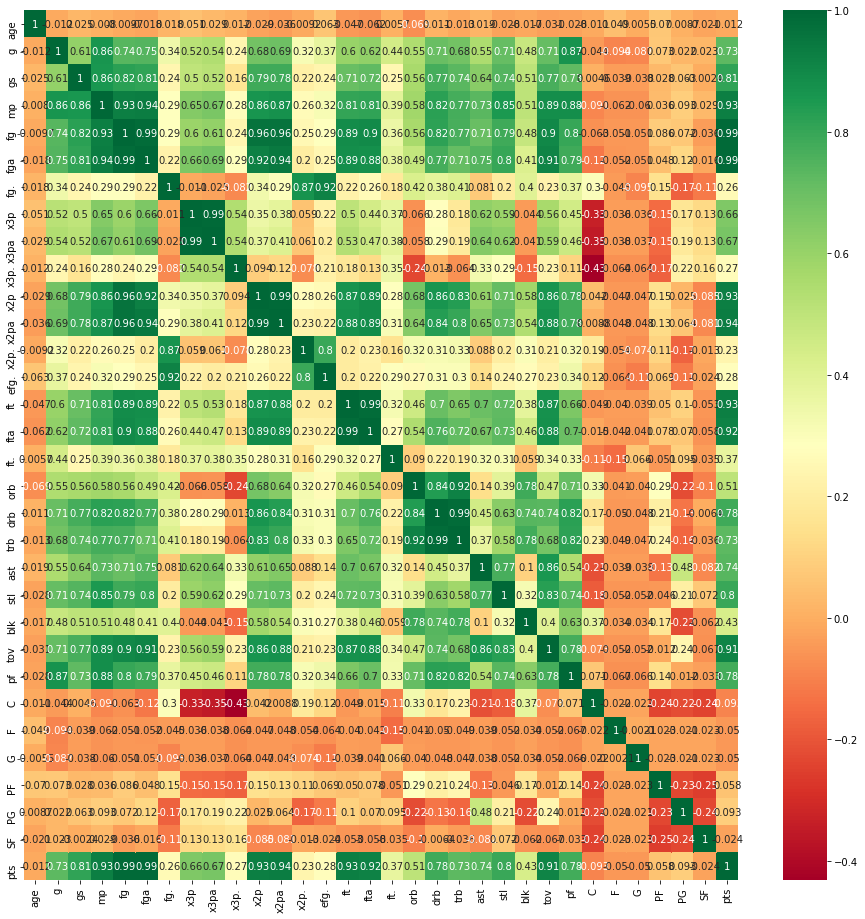

In [ ]:
fig = plt.figure(figsize=(16, 16))

fig.set_facecolor('white')

sns.heatmap(nba_5.corr(), annot=True, cmap="RdYlGn")

####From these evaluations we can select the features that affect points.fg is themost critical feature.we can avoid attempts features and also percentages.We take only number of goals scored.There we can avoid x3pa,x3p.,x2pa,x2p.,fg.,fta,ft..We take efg. because it is the feature that gives more weightage to 3 point goals than 2 point goals.We also avoid very low scoring features like the postion columns,age.blk.


In [ ]:
selected_features=['fg','fga','mp','x2p','x3p','ft','tov','drb','pf','stl','trb','ast','g','gs','orb','efg.']

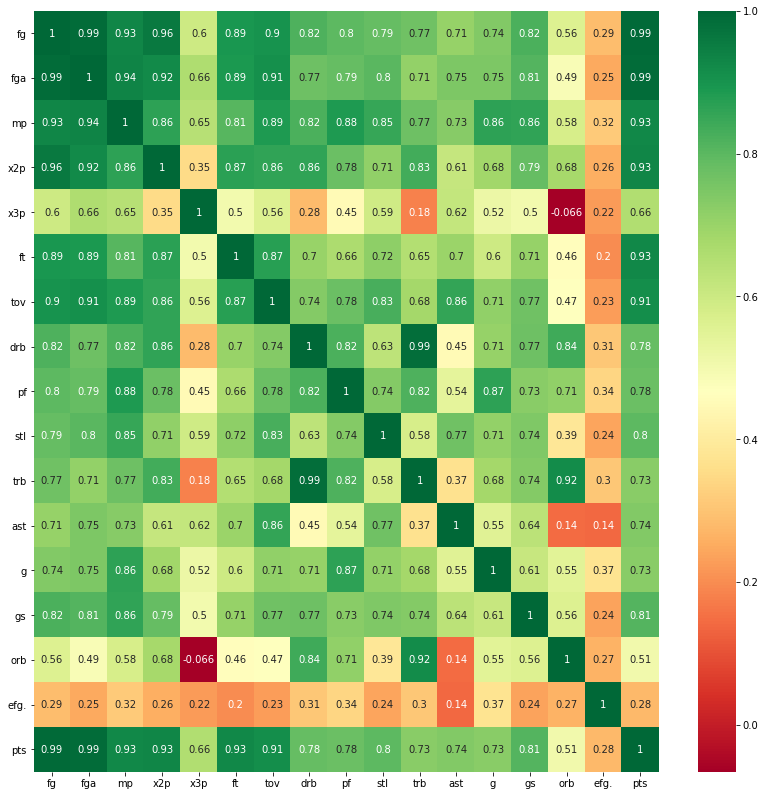

In [ ]:
nba_6 =nba_5[selected_features + ['pts']]
fig = plt.figure(figsize=(14, 14))

fig.set_facecolor('white')

sns.heatmap(nba_6.corr(), annot=True, cmap="RdYlGn")
_ = plt.yticks(rotation='horizontal')

In [ ]:
data = nba_4[orig_features]

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
transformed = scaler.fit_transform(data)

In [ ]:
pca = PCA(n_components=1)

In [ ]:
decomposed = pca.fit_transform(transformed)

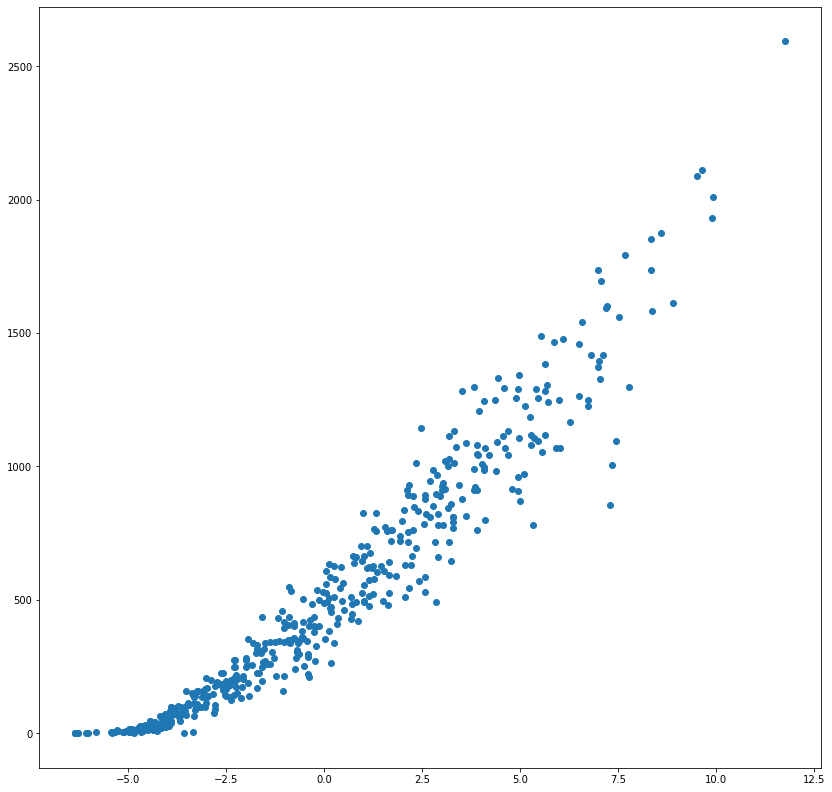

In [ ]:
plt.figure(figsize=(14, 14))

plt.scatter(decomposed, nba_4.pts)

####There is a positive correlation

## Model Building

In [ ]:
from sklearn import linear_model

In [ ]:
x=nba_5[selected_features]

y=nba_5['pts']

In [ ]:
x

,fg,fga,mp,x2p,x3p,ft,tov,drb,pf,stl,trb,ast,g,gs,orb,efg.
0,66,141,847,62,4,35,30,144,122,23,216,28,63,0,72,0.482
1,93,185,1197,93,0,79,71,190,203,40,332,43,81,20,142,0.503
2,143,275,961,143,0,76,39,204,108,24,306,38,53,12,102,0.520
3,464,1011,2552,336,128,274,146,230,136,35,262,248,73,73,32,0.522
4,136,249,951,136,0,56,63,183,187,23,277,40,56,30,94,0.546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,345,808,1765,305,40,209,204,159,151,78,228,217,72,16,69,0.452
477,387,889,1810,252,135,235,95,137,156,46,166,95,64,9,29,0.511
478,582,1283,2718,492,90,163,165,310,213,167,476,182,79,78,166,0.489
479,172,404,1416,172,0,146,87,235,170,40,353,92,82,3,118,0.426


In [ ]:
y

0       171
1       265
2       362
3      1330
4       328
       ... 
476     939
477    1144
478    1417
479     490
480     399
Name: pts, Length: 481, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
len(x_train)

384

In [ ]:
len(x_test)

97

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
clf=LinearRegression()

In [ ]:
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
clf.predict(x_test)

array([6.600e+01, 5.480e+02, 4.950e+02, 3.000e+00, 4.870e+02, 8.140e+02,
       7.580e+02, 7.600e+01, 3.700e+01, 3.500e+02, 1.100e+01, 7.500e+01,
       4.990e+02, 1.007e+03, 4.360e+02, 1.810e+02, 1.360e+02, 4.720e+02,
       1.320e+02, 7.600e+01, 5.110e+02, 2.720e+02, 1.488e+03, 4.970e+02,
       5.030e+02, 3.930e+02, 4.140e+02, 9.000e+00, 2.080e+02, 4.900e+02,
       9.700e+01, 4.900e+02, 6.800e+01, 8.100e+02, 5.460e+02, 6.410e+02,
       8.930e+02, 9.200e+01, 2.740e+02, 2.580e+02, 8.400e+01, 2.700e+02,
       2.020e+02, 5.100e+02, 2.089e+03, 1.478e+03, 8.310e+02, 2.170e+02,
       4.920e+02, 8.300e+01, 6.450e+02, 2.490e+02, 7.700e+02, 7.840e+02,
       1.610e+02, 1.295e+03, 8.460e+02, 5.270e+02, 7.160e+02, 2.980e+02,
       7.610e+02, 8.590e+02, 9.300e+02, 7.300e+01, 7.400e+01, 1.113e+03,
       1.090e+03, 2.000e+00, 1.590e+02, 4.850e+02, 7.670e+02, 9.880e+02,
       9.390e+02, 1.583e+03, 2.000e+00, 3.800e+01, 3.010e+02, 1.372e+03,
       1.873e+03, 1.042e+03, 7.590e+02, 4.170e+02, 

In [ ]:
clf.score(x_test,y_test)

1.0

## K_Fold

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x_test,y_test,cv=cv)

array([1., 1., 1., 1., 1.])

##GridSearchCv

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [ ]:
def find_best_model(x,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
                       }                      
       },
       'lasso':{
           'model':Lasso(),
           'params':{
               'alpha':[1,2],
               'selection':['random','cyclic']
           }
        },
         'ridge':{
            'model':Ridge(),
            'params':{
                'alpha':[.05,1],
                'normalize':[True,False]
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gridsrh=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gridsrh.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gridsrh.best_score_,
            'best_params':gridsrh.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [ ]:
find_best_model(x_test,y_test)

,model,best_score,best_params
0,linear_regression,1.000000,{'normalize': True}
1,lasso,0.999999,"{'alpha': 1, 'selection': 'cyclic'}"
2,ridge,1.000000,"{'alpha': 0.05, 'normalize': False}"


####Model Can predict 100% correctly.